## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.924203 -0.165990  1.546659 -0.202020 -0.192889  1.035852
1  0.120607  0.625757 -0.797811 -0.593745 -0.448788  0.248414
2  1.345919 -0.148333 -1.297106 -1.455460  1.287499  0.807539
3  1.088141 -1.280363 -0.606359  1.416240  0.631678  0.621058
4 -1.575127  0.700964  0.957209 -1.237930 -1.555075 -2.375527


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.8836713	total: 46.5ms	remaining: 46.4s
1:	learn: 0.8766710	total: 46.8ms	remaining: 23.4s
2:	learn: 0.8685638	total: 47.2ms	remaining: 15.7s
3:	learn: 0.8608030	total: 47.6ms	remaining: 11.8s
4:	learn: 0.8552991	total: 47.9ms	remaining: 9.54s
5:	learn: 0.8469884	total: 48.2ms	remaining: 7.99s
6:	learn: 0.8399170	total: 48.6ms	remaining: 6.89s
7:	learn: 0.8346341	total: 49ms	remaining: 6.07s
8:	learn: 0.8283941	total: 49.3ms	remaining: 5.43s
9:	learn: 0.8218643	total: 49.7ms	remaining: 4.92s
10:	learn: 0.8155477	total: 50.2ms	remaining: 4.51s
11:	learn: 0.8076914	total: 50.5ms	remaining: 4.16s
12:	learn: 0.8009611	total: 50.9ms	remaining: 3.87s
13:	learn: 0.7959505	total: 51.3ms	remaining: 3.61s
14:	learn: 0.7897449	total: 51.8ms	remaining: 3.4s
15:	learn: 0.7820622	total: 52.3ms	remaining: 3.21s
16:	learn: 0.7757166	total: 52.6ms	remaining: 3.04s
17:	learn: 0.7680950	total: 53ms	remaining: 2.89s
18:	learn: 0.7624383	total: 53.3ms	remaining: 2.7

173:	learn: 0.2406553	total: 109ms	remaining: 518ms
174:	learn: 0.2393261	total: 110ms	remaining: 516ms
175:	learn: 0.2378113	total: 110ms	remaining: 515ms
176:	learn: 0.2359148	total: 110ms	remaining: 513ms
177:	learn: 0.2337227	total: 111ms	remaining: 511ms
178:	learn: 0.2318499	total: 111ms	remaining: 510ms
179:	learn: 0.2302773	total: 111ms	remaining: 508ms
180:	learn: 0.2289358	total: 112ms	remaining: 506ms
181:	learn: 0.2276453	total: 112ms	remaining: 504ms
182:	learn: 0.2256307	total: 113ms	remaining: 503ms
183:	learn: 0.2240227	total: 113ms	remaining: 501ms
184:	learn: 0.2224129	total: 113ms	remaining: 500ms
185:	learn: 0.2206605	total: 114ms	remaining: 498ms
186:	learn: 0.2191599	total: 114ms	remaining: 497ms
187:	learn: 0.2177118	total: 115ms	remaining: 495ms
188:	learn: 0.2159807	total: 115ms	remaining: 493ms
189:	learn: 0.2144841	total: 115ms	remaining: 492ms
190:	learn: 0.2132702	total: 116ms	remaining: 490ms
191:	learn: 0.2114790	total: 116ms	remaining: 489ms
192:	learn: 

442:	learn: 0.0411459	total: 211ms	remaining: 266ms
443:	learn: 0.0409384	total: 212ms	remaining: 265ms
444:	learn: 0.0407289	total: 212ms	remaining: 265ms
445:	learn: 0.0405384	total: 213ms	remaining: 264ms
446:	learn: 0.0403517	total: 213ms	remaining: 263ms
447:	learn: 0.0401854	total: 213ms	remaining: 263ms
448:	learn: 0.0399460	total: 214ms	remaining: 262ms
449:	learn: 0.0397829	total: 214ms	remaining: 262ms
450:	learn: 0.0396021	total: 214ms	remaining: 261ms
451:	learn: 0.0393564	total: 215ms	remaining: 260ms
452:	learn: 0.0391037	total: 215ms	remaining: 260ms
453:	learn: 0.0388652	total: 216ms	remaining: 259ms
454:	learn: 0.0386760	total: 216ms	remaining: 259ms
455:	learn: 0.0385225	total: 216ms	remaining: 258ms
456:	learn: 0.0382941	total: 217ms	remaining: 257ms
457:	learn: 0.0381435	total: 217ms	remaining: 257ms
458:	learn: 0.0380006	total: 217ms	remaining: 256ms
459:	learn: 0.0378397	total: 218ms	remaining: 256ms
460:	learn: 0.0376995	total: 218ms	remaining: 255ms
461:	learn: 

724:	learn: 0.0135355	total: 312ms	remaining: 118ms
725:	learn: 0.0135137	total: 312ms	remaining: 118ms
726:	learn: 0.0134898	total: 313ms	remaining: 117ms
727:	learn: 0.0134152	total: 313ms	remaining: 117ms
728:	learn: 0.0133423	total: 313ms	remaining: 117ms
729:	learn: 0.0132539	total: 314ms	remaining: 116ms
730:	learn: 0.0132246	total: 314ms	remaining: 116ms
731:	learn: 0.0131669	total: 314ms	remaining: 115ms
732:	learn: 0.0131381	total: 315ms	remaining: 115ms
733:	learn: 0.0131115	total: 315ms	remaining: 114ms
734:	learn: 0.0130550	total: 316ms	remaining: 114ms
735:	learn: 0.0130243	total: 316ms	remaining: 113ms
736:	learn: 0.0129991	total: 316ms	remaining: 113ms
737:	learn: 0.0129816	total: 317ms	remaining: 112ms
738:	learn: 0.0129300	total: 317ms	remaining: 112ms
739:	learn: 0.0128748	total: 317ms	remaining: 112ms
740:	learn: 0.0128397	total: 318ms	remaining: 111ms
741:	learn: 0.0128125	total: 318ms	remaining: 111ms
742:	learn: 0.0127581	total: 318ms	remaining: 110ms
743:	learn: 

992:	learn: 0.0056970	total: 407ms	remaining: 2.87ms
993:	learn: 0.0056812	total: 408ms	remaining: 2.46ms
994:	learn: 0.0056727	total: 408ms	remaining: 2.05ms
995:	learn: 0.0056649	total: 409ms	remaining: 1.64ms
996:	learn: 0.0056496	total: 409ms	remaining: 1.23ms
997:	learn: 0.0056279	total: 409ms	remaining: 820us
998:	learn: 0.0056203	total: 410ms	remaining: 410us
999:	learn: 0.0056128	total: 410ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

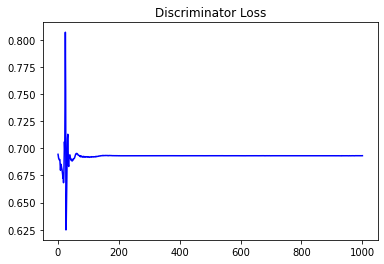

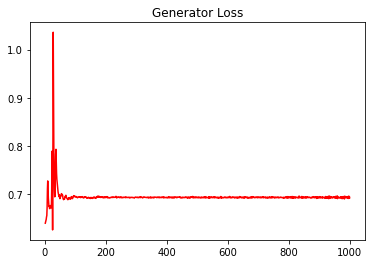

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.4702699236346344


#### Sanity Checks 

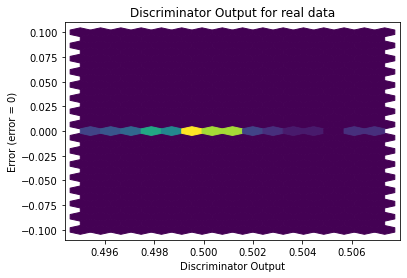

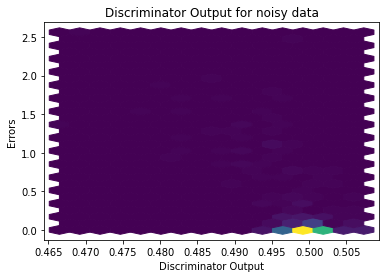

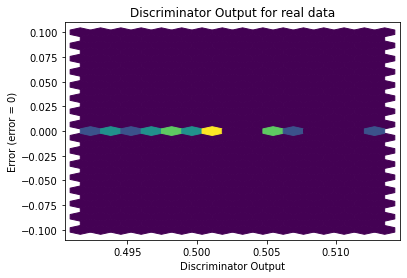

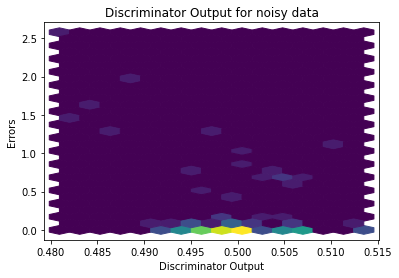

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


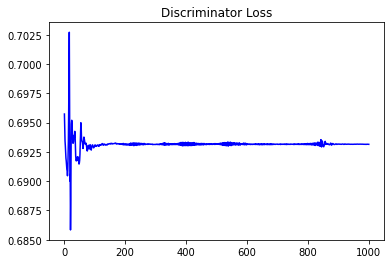

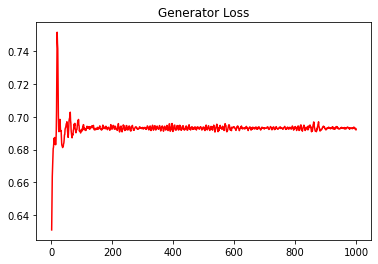

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.5341641513261104


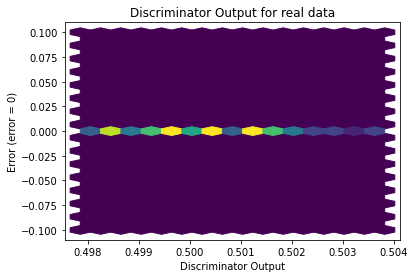

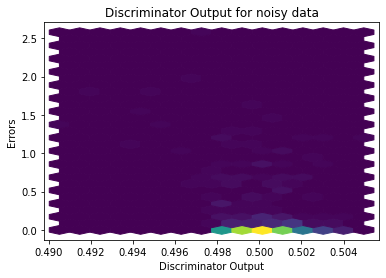

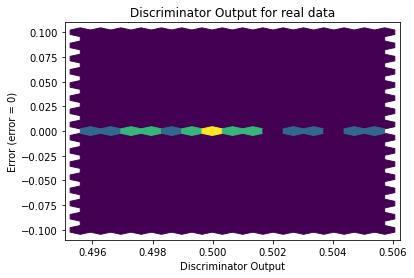

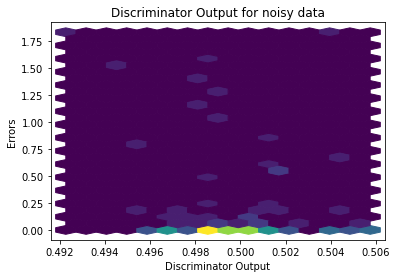

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1263]], device='cuda:0', requires_grad=True)
